# lec 7. Typical scikit-learn Workflow

# Introductionto Scikti-Learn (sklearrn)

This notebook demonstarate some of the most useful functions of the beatutiful Sckiit-Learn Library


What we're going to cover

0. An end to end Skicit-Learn woirkflow

1. Getting the data raedy

2. Choose the right/algotritm and use it to make predictions on our data

3. Fit the model/Alogoritm and use it to make prediction on our data

4. Evaluating a model

5. Improve a model

6. Save and load a trained model

7. Putting all together


In [86]:
# importing Dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 0. An end-to-end Scikit- Learn Workflow

In [87]:
# 1. Get the data ready 

import pandas as pd

heart_disease= pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Now our target is to use the data of each columns to predict the target value

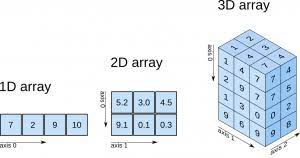
Review to axes int matrix

In [88]:
# create X (features matrix)
X = heart_disease.drop("target", axis=1) # selecting by droping cloumns

# create Y (label Vector)

Y = heart_disease["target"]

In [89]:
# 2. Choose the right model and hyperparameters
# import Random Forest Model class from sklearn's ensemble module

from sklearn.ensemble import RandomForestClassifier

# now we instantiate this RandomForest Class

clf= RandomForestClassifier(n_estimators=100) #we setting the hyper Prameter n_estimators to 100

# We'll keep the defualt hyperparameters
clf.get_params() #we can see the parameter what this Model is using

# Review : to access atributes only use . and name and to use fuction use .name()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [90]:
# 3. Fit the model  to the data

# now we've to split our data into tain and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
# it means the size of test set is 20% of the data

In [91]:
# Now we are fitting our data into algorithm to find patterns

clf.fit(X_train, Y_train)

RandomForestClassifier()

In [92]:
# Make a prediction

y_label= clf.predict(np.array([0,2,3,4])) # this will give us errors becuase
#our input data is not similar to the data on which model trained on

C:\Users\ay569\Downloads\ML_Data_Analysis\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [93]:
# Now Making the prediction on our test data

y_preds= clf.predict(X_test)

In [94]:
Y_test

282    0
158    1
122    1
235    0
267    0
      ..
19     1
227    0
171    0
181    0
164    1
Name: target, Length: 61, dtype: int64

In [95]:
# 4. Evaluate  the  model on the training data and test data

# here 1 means model got accurate 100 % on training data 
clf.score(X_train, Y_train)

1.0

In [96]:
clf.score(X_test, Y_test) # it tells the means error in our pridiction

0.8032786885245902

Here our model is 73 % accurate on our test data becuase if never seen the test data and also the lables

In [97]:
# here  we trying to evaluating our model on some more mectrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(Y_test,y_preds)) # it takes actual labels vs precicted labels

              precision    recall  f1-score   support

           0       0.80      0.74      0.77        27
           1       0.81      0.85      0.83        34

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [98]:
confusion_matrix(Y_test, y_preds)

array([[20,  7],
       [ 5, 29]], dtype=int64)

In [99]:
accuracy_score(Y_test, y_preds)

0.8032786885245902

In [100]:
# 5. Improve a model

# Try different amout of n_estimators

np.random.seed(42)
# here we're trying to guess the n_estimators using random numbers
for i in range(10,100,10):
    print(f"Trying model with {i} estimators...")
    clf= RandomForestClassifier(n_estimators=i).fit(X_train, Y_train)
    print(f"Model acurracy on test set : {clf.score(X_test, Y_test) * 100: .5f}%") # print upto 2 decimal places
    maxi=1e-5
    print(" ")

Trying model with 10 estimators...
Model acurracy on test set :  83.60656%
 
Trying model with 20 estimators...
Model acurracy on test set :  83.60656%
 
Trying model with 30 estimators...
Model acurracy on test set :  81.96721%
 
Trying model with 40 estimators...
Model acurracy on test set :  85.24590%
 
Trying model with 50 estimators...
Model acurracy on test set :  80.32787%
 
Trying model with 60 estimators...
Model acurracy on test set :  83.60656%
 
Trying model with 70 estimators...
Model acurracy on test set :  81.96721%
 
Trying model with 80 estimators...
Model acurracy on test set :  83.60656%
 
Trying model with 90 estimators...
Model acurracy on test set :  83.60656%
 


Here we get the max accuracy of 83% from 73% by adjusting one of our hyperparameters n estimators

In [101]:
# 6. Save a model and load it

import pickle

pickle.dump(clf, open("random_forest_model_1.pk1", "wb")) # wb meaning write binary

In [102]:
loaded_model= pickle.load(open("random_forest_model_1.pk1", "rb")) #rb -> read binary

# checking the accuracy of saved model
loaded_model.score(X_test,Y_test)

0.8360655737704918

# Lec 8 Debugging warnig in Jupyter Notebook

In [103]:
# we can ignore all the warinigs by this method

import warnings
warnings.filterwarnings("ignore") # this solution is not recommeded
# type "default" in place of ignore to set it back to defualt

above we're getting the warnig related to the hyperparameter diferrnce in different versions

In [104]:
# getting version of scikit learn

import sklearn

sklearn.show_versions()


System:
    python: 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\ay569\Downloads\ML_Data_Analysis\env\python.exe
   machine: Windows-10-10.0.22000-SP0

Python dependencies:
          pip: 21.2.4
   setuptools: 61.2.0
      sklearn: 1.0.2
        numpy: 1.22.3
        scipy: 1.7.3
       Cython: None
       pandas: 1.4.2
   matplotlib: 3.5.1
       joblib: 1.1.0
threadpoolctl: 2.2.0

Built with OpenMP: True


### How do we upgrade the package in the conda env


conda activate your_env_name

conda list (show all the packages we're getting)

conda update scikit-learn (this will upgrade the version of scikit learn)

conda list scikit-learn (show the version  of sckit learn)

conda search scikit-learn (this will show what version are available for sckit-learn for conda)

conda search sci-learn --info (output with bit more info)

conda list python (to check wheather your python version is compatible or not)



### Reinstalling some of the dependencies

like numpy and pythons reinstall them with specific verion numbers

conda uninstall sckit-learn python (for unistalling dependencise) it will also unistall numpy and pandas because they are depend on python

conda install python=3.6.9 scikit-learn=0.22 matplotlib numpy jupyter notebook (to reinstall all the dependencies) back

Now check again all the version of all dependencies and re run your notebook

# Introductionto Scikti-Learn (sklearrn)

In [105]:
# This notebook demonstarate some of the most useful functions of the beatutiful Sckiit-Learn Library

# lets Listify the content

What_were_going_to_cover=[

"0. An end to end Skicit-Learn woirkflow",

"1. Getting the data raedy",

"2. Choose the right/algotritm and use it to make predictions on our data",

"3. Fit the model/Alogoritm and use it to make prediction on our data",

"4. Evaluating a model",

"5. Improve a model",

"6. Save and load a trained model",

"7. Putting all together"]

In [106]:
What_were_going_to_cover

['0. An end to end Skicit-Learn woirkflow',
 '1. Getting the data raedy',
 '2. Choose the right/algotritm and use it to make predictions on our data',
 '3. Fit the model/Alogoritm and use it to make prediction on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting all together']

# Lec 9. Getting Your Data Ready Splitting Your Data

## 1. Getting data ready to be used with machine learning

Three main things we have to do:

    1. Spliting data inot features and labels (usually 'X' and 'Y')
    2. Filling (also called imputing) or disregarding missing values
    3. converting non- numerical values to numerical values (also called fearure encoding)

In [107]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [108]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [109]:
Y=heart_disease["target"]
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [110]:
# Splitting the data into training and testing set

from sklearn.model_selection import train_test_split

x_train , x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [111]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [112]:
X.shape[0] *0.8

242.4

In [113]:
242 + 61

303

In [114]:
len(heart_disease)

303

# Lec 10. Quick Tip Clean, Transform, Reduce

Steps we' re going to do in next couple of lecs 

Clean Data -> Transform Data -> Reduce Data


Why do we need to clean our data?

Ans. sometime the data we get is not always complete it consist some missing values, missing lables, it will not going to allow us in building machine learning models so we usually remove the column which has missing value, label or we can fill that with some sort of mean like in example of house holds prices, we might notice some outlier that we should remove.

Why Data transformation?

Ans. The machine learning models not usually good with handling text or images because they don't understand them they only undersatand numbers so we need to transform our data into number so that we can feed it to our machine learning model

What is the need of reducing data ?

Ans. More data is usually good but the more data we have it require us more computaion power to compute and process that data so if we get the same result by using less amount of data it will save the companies money, some time data reduction also results in dimensionality reduction or column reduction so we can remove some columns which are irrelevant and won't be needed to for our machine learning model.

# Lec 11. Getting Your Data Ready Convert Data To Numbers

### 1.1 make sure our data is all numerical

In [115]:
car_sales= pd.read_csv("car-sales-extended.csv")
car_sales.head(20)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
5,Honda,Red,42652,4,23883
6,Toyota,Blue,163453,4,8473
7,Honda,White,43120,4,20306
8,Nissan,White,130538,4,9374
9,Honda,Blue,51029,4,26683


In [116]:
len(car_sales)

1000

In [117]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

### Trying without converting our data into nummbers

In [118]:
# Split int X/y

X=car_sales.drop("Price", axis =1)
y= car_sales["Price"]

# Spit into training and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [119]:
# Build machine learnig model

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

# we're going to getting error 

ValueError: could not convert string to float: 'Toyota'

In [ ]:
car_sales["Doors"].value_counts()

In [ ]:
X.head()

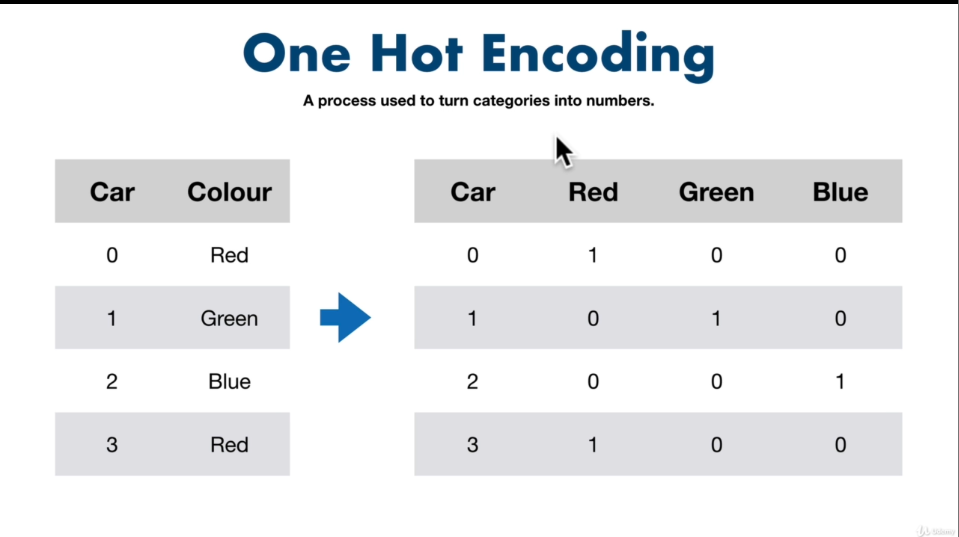

In [125]:
# Turn the categories into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features= ["Make", "Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                                remainder = "passthrough")
# interpretaion of above code is -> hey column transformer take the one hot
# incoder and apply it the categorical features for the remainder of the column
# that you find passthough don't do any thing to that

transformed_X = transformer.fit_transform(X) # fitting our transformer to our X data
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [126]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [127]:
pd.DataFrame(transformed_X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


In [128]:
# Second way using Pandas
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies.head(10)

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
5,4,0,1,0,0,0,0,0,1,0
6,4,0,0,0,1,0,1,0,0,0
7,4,0,1,0,0,0,0,0,0,1
8,4,0,0,1,0,0,0,0,0,1
9,4,0,1,0,0,0,1,0,0,0


In [129]:
# Let's refit the data

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,y,test_size=0.2)
model.fit(X_train, y_train)

RandomForestRegressor()

In [130]:
model.score(X_test, y_test)

0.3235867221569877

# Lec 12. Getting Your Data Ready Handling Missing Values With Pandas

### What if there were missing values?

1. Fill them with some value (also known as imputation) "Not usually recommended"

2. Remove the samples with missing data altogether

In [131]:
# Impot cara sale missing data

car_sales_missing =pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [132]:
# checking out missing values in data 

car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [133]:
# Create X and y

X=car_sales_missing.drop("Price", axis=1)
y=car_sales["Price"]

In [134]:
# let.s try to convert it into numbers

# Turn the categories into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features= ["Make", "Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                                remainder = "passthrough")
# interpretaion of above code is -> hey column transformer take the one hot
# incoder and apply it the categorical features for the remainder of the column
# that you find passthough don't do any thing to that

transformed_X = transformer.fit_transform(X) # fitting our transformer to our X data
transformed_X

# Note it will give your error because our data contains missing values

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [135]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


### Option 1: Fill missing data with pandas

Their is no perfect way to fill out missing data 

In [136]:
# Fill the "Make" column

car_sales_missing["Make"].fillna("missing", inplace= True)

# Fill the "Colour" column

car_sales_missing["Colour"].fillna("missing", inplace = True)

# Fill the "Odometer" column

car_sales_missing["Odometer (KM)"].fillna("missing", inplace= True)

# Fill the "Doors" column

car_sales_missing["Doors"].fillna(4, inplace = True)


In [137]:
# Check our dataframe again

car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [138]:
# Remove rows with misisng price values

car_sales_missing.dropna(inplace = True)

In [139]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [140]:
len(car_sales_missing),
car_sales_missing

# we lost about 50 data points 

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,missing,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [141]:
# Recreating X and y

X= car_sales_missing.drop("Price", axis =1)
y= car_sales_missing["Price"]

In [142]:
# let.s try to convert it into numbers

# Turn the categories into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features= ["Make", "Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                                remainder = "passthrough")
# interpretaion of above code is -> hey column transformer take the one hot
# incoder and apply it the categorical features for the remainder of the column
# that you find passthough don't do any thing to that

transformed_X = transformer.fit_transform(car_sales_missing) # fitting our transformer to our X data
transformed_X

array([[0.0, 1.0, 0.0, ..., 0.0, 35431.0, 15323.0],
       [1.0, 0.0, 0.0, ..., 1.0, 192714.0, 19943.0],
       [0.0, 1.0, 0.0, ..., 0.0, 84714.0, 28343.0],
       ...,
       [0.0, 0.0, 1.0, ..., 0.0, 66604.0, 31570.0],
       [0.0, 1.0, 0.0, ..., 0.0, 215883.0, 4001.0],
       [0.0, 0.0, 0.0, ..., 0.0, 248360.0, 12732.0]], dtype=object)

# Lec 14. Getting Your Data Ready Handling Missing Values With Scikit-learn

The main takeaways:

* Split your data first (into train/test), always keep your training & test data separate

* Fill/transform the training set and test sets separately (this goes for filling data with pandas as well)

* Don't use data from the future (test set) to fill data from the past (training set)

In [143]:
car_sales_missing=pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [144]:
# Checking the missing values
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [145]:
# Removing all the rows that contain missing values in Price cloumn
car_sales_missing.dropna(subset=["Price"], inplace = True)
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [146]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [147]:
# Split into X and y

X = car_sales_missing.drop("Price", axis= 1)
y = car_sales_missing["Price"]

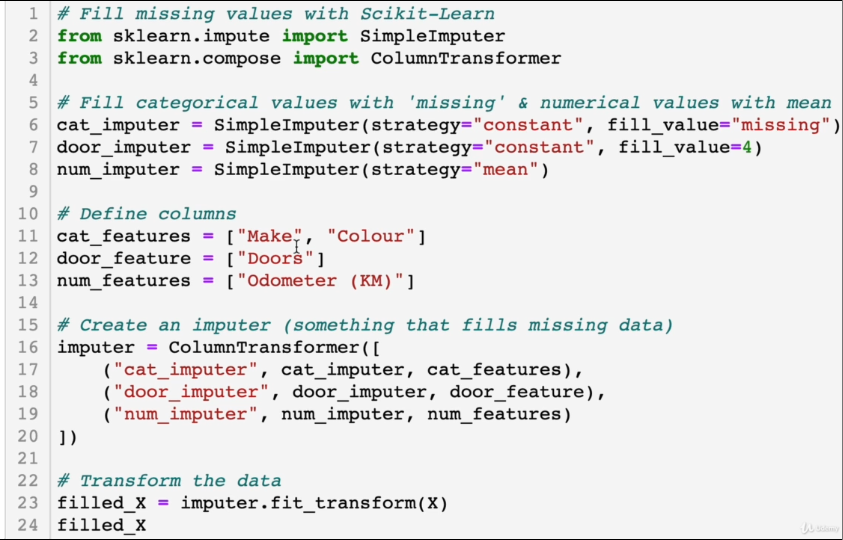

In [148]:
# fill missing values with Scikit- Learn

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Filling catergorical values with 'Missning' & numericl values with mean
cat_imputer = SimpleImputer(strategy = "constant", fill_value = "missing")
door_imputer = SimpleImputer(strategy = "constant", fill_value = 4)
num_imputer = SimpleImputer(strategy = "mean")

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (Something that fils missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# Transform the data

filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [149]:
# recreating our data frame
car_sales_filled = pd.DataFrame(filled_X, 
                                 columns= ["Make", "Colour", "Doors", "Odometer (KM)"])

In [150]:
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [151]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [152]:
# let.s try to convert it into numbers

# Turn the categories into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features= ["Make", "Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                                remainder = "passthrough")
# interpretaion of above code is -> hey column transformer take the one hot
# incoder and apply it the categorical features for the remainder of the column
# that you find passthough don't do any thing to that

transformed_X = transformer.fit_transform(car_sales_filled) # fitting our transformer to our X data
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [153]:
# Now we've got our data as numbers and filled (no missing values)

# Let's fit a model

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                   y,
                                                   test_size=0.2)
model =RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21990196728583944

In [154]:
# this model performs worst than previous model due to lack of data points

len(car_sales_filled), len(car_sales)

(950, 1000)

# Part 2: Choosing the right Model/ Estimator/Algorithm for our problem

Scikit-Learn uses estimator as another term for machine learning or algorithm

* Classification -> predictiong whether a sample is one thing or another

* Regression -> predictiong a number

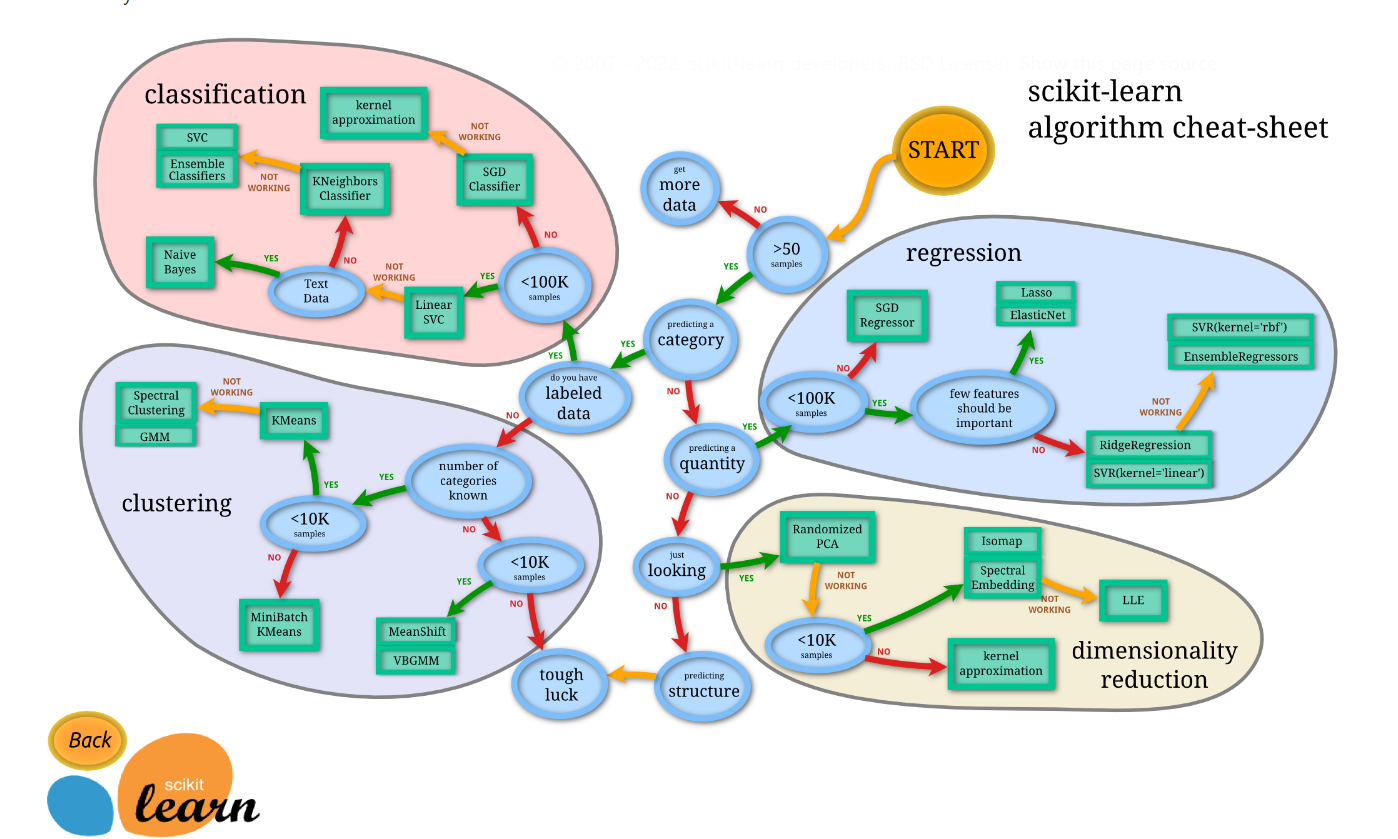
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

# Lec 15. Choosing The Right Model For Your Data

### 2.1 Piking a mcahine learning model for a regression problem

In [155]:
# Boston housing dataset import

from sklearn.datasets import load_boston
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [156]:
boston_df = pd.DataFrame(boston["data"], columns = boston["feature_names"])
boston_df["target"] =pd.Series(boston ["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### Boston dataset Data Dictionary

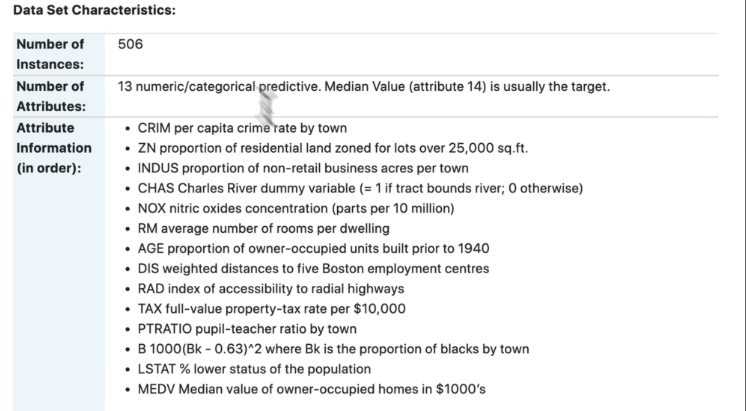

In [157]:
# How many smaples?
len(boston_df)

506

In [158]:
# Let's try the ridge regression model
from sklearn.linear_model import Ridge

# Setup random seed

np.random.seed(42)

# Creating the data 
X = boston_df.drop("target", axis =1)
y = boston_df["target"]

# Splitting into tarin and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)

# Intantiate Ridge model

model_rg= Ridge()
model_rg.fit(X_train, y_train)

# Check the score of the Ridge model on test data 

model_rg.score(X_test, y_test)

0.6662221670168519

How do we improve this score ?

What if Ridge will not work?

# Lec 16. Choosing The Right Model For Your Data 2 (Regression)

Lets refer back to the map

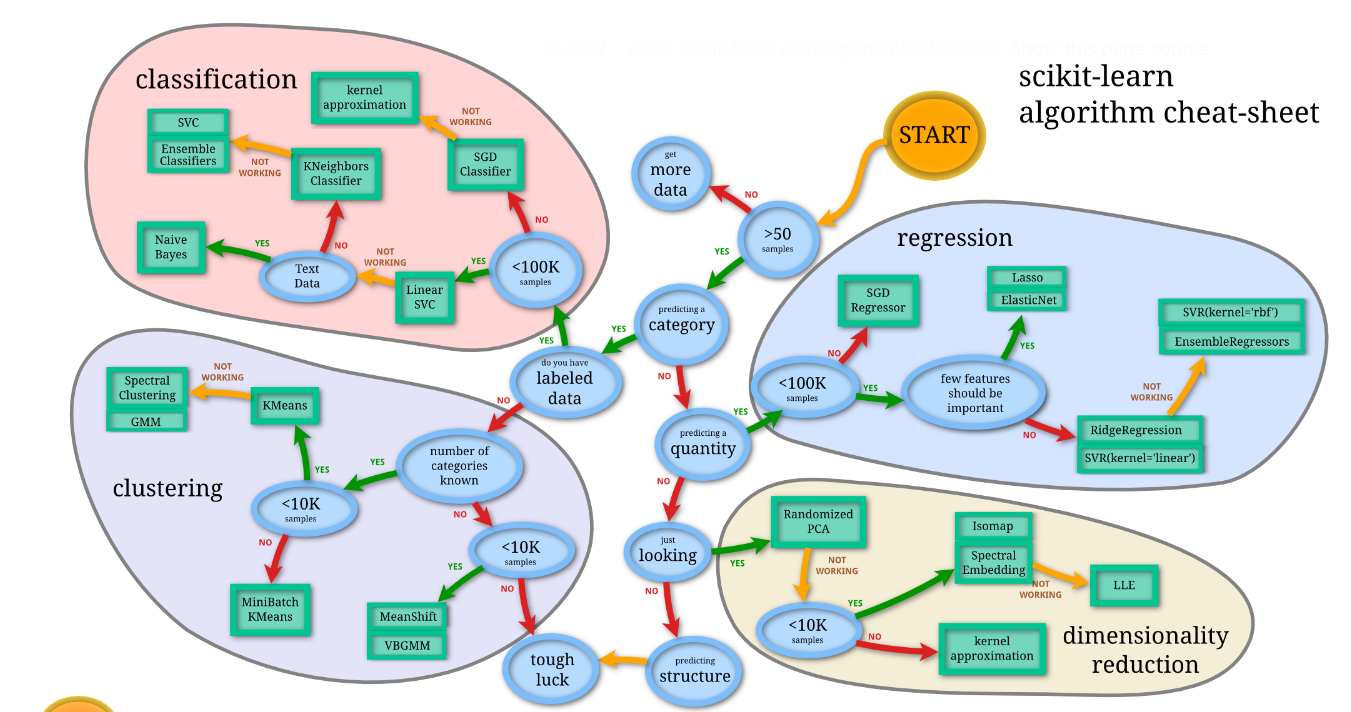

Ensemble means -> combine the small ML methods

In [159]:
# Les't try the random Forest Regression

from sklearn.ensemble import RandomForestRegressor

# creating random seed
np.random.seed(42)

# Creating our data 
X= boston_df.drop("target", axis =1)
y= boston_df["target"]

# Splititng our data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # we can also increase accuracy by using right taining and testing size

# instaintiating our model

model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

# Accuracy score

model_rf.score(X_test, y_test)

0.8654448653350507

In [160]:
# Check the Ridge model again
model_rg.score(X_test, y_test)

0.6662221670168519

# lec 18. Quick Tip How ML Algorithms Work

### How Decision Tree work

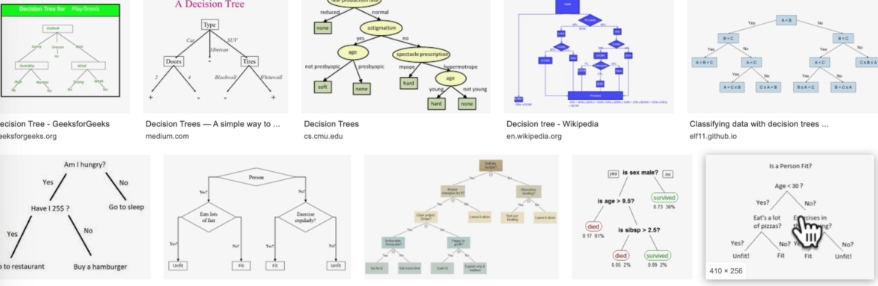

It try to make a program that try to create a program with if-else condition

# Lec 19. Choosing The Right Model For Your Data 3 (Classification)

### 2.2 Choosing Estimator for classification problem`

In [161]:
heart_disease= pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [162]:
len(heart_disease)

303

Consulting the map and it says try linear SVS

In [163]:
# Import the LinearSVC estimator class

from sklearn.svm import LinearSVC

# Setup random seed

np.random.seed(42)

# creating the data 

X=heart_disease.drop("target", axis =1)
y=heart_disease["target"]

# Spiltting the data 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2)

# instansiating the model 

clf = LinearSVC(max_iter =1000)

clf.fit(X_train,y_train)

# checking accuracy score od the model

clf.score(X_test, y_test)

0.8688524590163934

In [164]:
# couting the value of target column
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [165]:
# Import the RandomForestClassifier estimator classs

from sklearn.ensemble import RandomForestClassifier

# Setup random seed

np.random.seed(42)

# creating the data 

X=heart_disease.drop("target", axis =1)
y=heart_disease["target"]

# Spiltting the data 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2)

# instansiating the model 

model_rf= RandomForestClassifier()

model_rf.fit(X_train,y_train)

# checking accuracy score of the model

model_rf.score(X_test, y_test)

0.8524590163934426

# Tidbit:
    1. If you have structured data, use ensemble methods
    2. if you have unstructured data, use Deep learning

# Lec 20. Fitting A Model To The Data

An end to end Skicit-Learn woirkflow

1. Getting the data raedy

2. Choose the right/algotritm and use it to make predictions on our data

3. Fit the model/Alogoritm and use it to make prediction on our data

4. Evaluating a model

5. Improve a model

6. Save and load a trained model

Putting all together

# Step 3 Fit the model/ Algorittm on our data and use it to make prediction

### 3.1 Fitting the model to the data

* X = features, features variable, data
* y= lables, target, target variable

In [166]:
# Import the RandomForestClassifier estimator classs

from sklearn.ensemble import RandomForestClassifier

# Setup random seed

np.random.seed(42)

# creating the data 

X=heart_disease.drop("target", axis =1)
y=heart_disease["target"]

# Spiltting the data 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2)

# instansiating the model 

model_rf= RandomForestClassifier()

#** Fit the model to our model (training machine learing model)

model_rf.fit(X_train,y_train)

# checking accuracy score of the model (use the patterns that model is learned)

model_rf.score(X_test, y_test)

0.8524590163934426

### What does the fit actually doing under the hood

In [167]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [168]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

Fitting model into model means we want to give the availabl data to the machine lerning alogrithm from which it find out the pattern,

And when it is deployed or use in production it wil make the predictions base d on that patterns that it found during the training period.

# Lec 21. Making Predictions With Our Model

### 3.2 Make Prediction using a machine learning model

Two ways to make prediction

    1. 'Predict()'
    2. 'Predict_proba()'

In [169]:
# Use a trained model to make Prediction

# Note use should required to give ML Model data similar to on which it was traine on in order make prediction

clf.predict([1,2,43,25,242]) # this dosen't work....

ValueError: Expected 2D array, got 1D array instead:
array=[  1   2  43  25 242].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [170]:
# checking the shape of Xtest
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [171]:
# using model to make prediction on testing data
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [172]:
# checking y_test and converting it to the np array to look as similar as abve

np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [173]:
# Compare prediction to truth label to evaluate the model

y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8688524590163934

In [174]:
# second way for model accuracy
clf.score(X_test, y_test)

0.8688524590163934

In [175]:
# another way for checking the model accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8688524590163934

# Lec 22. predict() vs predict_proba()

Making prediction using predict proba

Predict_proba() returns probability of a classification label

[Probailty of being 0, Probaillity of being 1]

In [176]:
# Predict_proba() returns probability of a classification label

model_rf.predict_proba(X_test[:5]) # prdicting first 5 data points

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [177]:
# Let's predict on the same data
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

# 23. Making Predictions With Our Model (Regression)

In [178]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [179]:
# using RandomForestRegressor for boston price Prediction

from sklearn.ensemble import RandomForestRegressor

# intializing random seed
np.random.seed(42)

# making our data

X = boston_df.drop("target", axis=1)
y= boston_df["target"]

# splitting our data set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# intaintioning our model
model = RandomForestRegressor() # .fit(X_train, y_train)

# Fitting our data to the model
model.fit(X_train, y_train)

# Make prediction
y_preds = model.predict(X_test)

In [180]:
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [181]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [182]:
# Compare the prediction to the truth

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.136382352941176

# Lec 24. Evaluating A Machine Learning Model (Score)

In [183]:
What_were_going_to_cover

['0. An end to end Skicit-Learn woirkflow',
 '1. Getting the data raedy',
 '2. Choose the right/algotritm and use it to make predictions on our data',
 '3. Fit the model/Alogoritm and use it to make prediction on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting all together']

# Step 4 : Evaluating a model (Important)

Three ways to evaluate Sciki-Learn models/ estimators
1. Estimator score method
2. The Scoring prameter
3. Problem-specific metric fuction

### 4.1 Evalution  a model using score method

In [184]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis =1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)


clf.score(X_train, y_train)

1.0

In [185]:
clf.score(X_test, y_test)

0.8524590163934426

Lets do the smame but for regression

In [186]:
# using RandomForestRegressor for boston price Prediction

from sklearn.ensemble import RandomForestRegressor

# intializing random seed
np.random.seed(42)

# making our data

X = boston_df.drop("target", axis=1)
y= boston_df["target"]

# splitting our data set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# intaintioning our model
model = RandomForestRegressor() # .fit(X_train, y_train)

# Fitting our data to the model
model.fit(X_train, y_train)

RandomForestRegressor()

In [187]:
model.score(X_test, y_test) # here score fuction is diferrent than classification

0.8654448653350507

# Lec 25. Evaluating A Machine Learning Model 2 (Cross Validation)

### 4.2 Evaluating a model using the scoring parameter

In [188]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis =1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)


clf.score(X_train, y_train); # ; to remove info

In [189]:
clf.score(X_test, y_test)

0.8524590163934426

In [190]:
cross_val_score(clf,X,y, cv = 10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.76666667, 0.7       , 0.83333333, 0.73333333, 0.8       ])

What cross validation is Doing

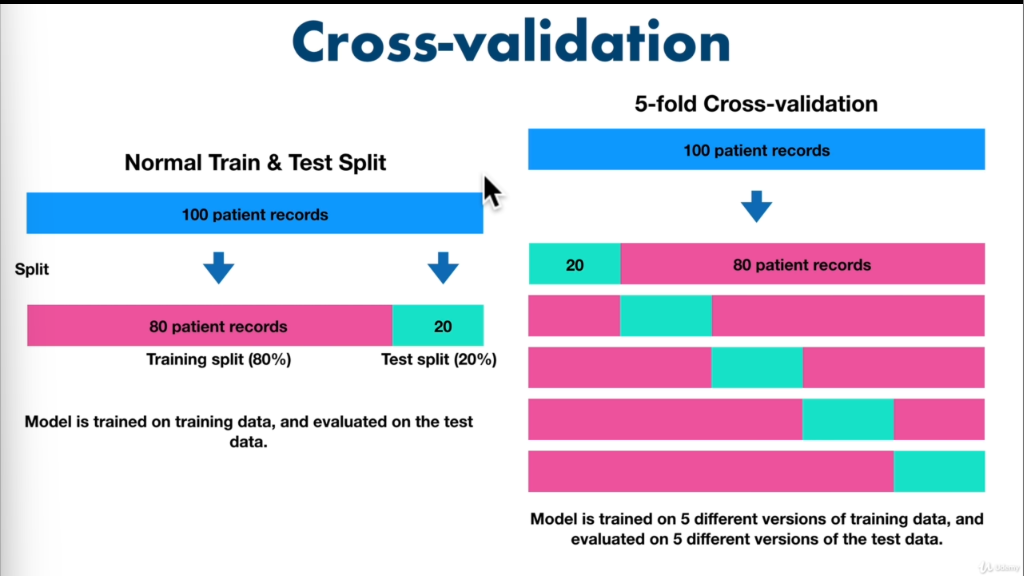

It does k different split the into k different versions of data and train k differnt models and evatuate and retrun the test score of those k models combined into in array

In [191]:
np.random.seed(42)

# Single training and test split score

clf_single_score= clf.score(X_test,y_test)

# Take the mean of 5- fold cross-validation score

clf_cross_val_score = np.mean(cross_val_score(clf, X, y))

# Compare the two

clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

Note: we always preffered to pick cross validation score over single score

In [192]:
# Default scoreing parrameter of classifier = mean accuracy
clf.score(X_test, y_test)

0.8524590163934426

In [193]:
# Scoring parameter set to None by defualt

cross_val_score(clf, X, y, cv =5, scoring = None) # none means it uses default scoring parameter of model

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

# Lec 26. Evaluating A Classification Model 1 (Accuracy)

### 4.2.1 Classification model evalution metrics

1. Accuracy
2. Area Under ROC curve
3. Confusin matrix
4. Classification Report

### 1. Accuracy

In [215]:
# impoting cross_val_score fuction from sklern's model_selection mudule
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# initiating random seed 
np.random.seed(42)

# creating data set
X= heart_disease.drop("target", axis=1)
y= heart_disease["target"]

# splitting our data into training and test set 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)

# instantiating RandomForessetRegressor class
clf = RandomForestClassifier()

# fitting our data for training into our RandomForrestRegressor Model
clf.fit(X_train, y_train)

# Scoring our model

clf.score(X_test, y_test)

0.8524590163934426

In [216]:
# impoting cross_val_score fuction from sklern's model_selection mudule
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# initiating random seed 
np.random.seed(42)

# creating data set
X= heart_disease.drop("target", axis=1)
y= heart_disease["target"]

# instantiating RandomForessetRegressor class
clf = RandomForestClassifier(n_estimators = 100)

cross_val_score = cross_val_score(clf, X, y, cv = 5)
cross_val_score

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [217]:
np.mean(cross_val_score)

0.8248087431693989

In [218]:
print(f"Heart Disease Clssifier Cross_validation Acuuracy :{np.mean(cross_val_score)*100:.2f}%")

Heart Disease Clssifier Cross_validation Acuuracy :82.48%


# Lec 27. Evaluating A Classification Model 2 (ROC Curve)

### 2. ROC Curve

**Area Under the Reciver Operatin Characterstic Curve (AUC/ROC)**

* Area Under Curve (AUC)
* ROC Curve

ROC curves are a comparison of a model's true positve rate(tpr) versus a models false positive rate (fpr).

* True Positive = model predicts 1 when trus is 1
* False Positive = modle predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [219]:
# Recreating X test .. etc

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)

In [222]:
# imporiting roc_curve from sklearn's metrics

from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)

# Make prediction with probabilities
y_proba = clf.predict_proba(X_test)
y_proba[:10]

array([[0.58, 0.42],
       [0.16, 0.84],
       [0.49, 0.51],
       [0.78, 0.22],
       [0.55, 0.45],
       [0.1 , 0.9 ],
       [0.29, 0.71],
       [0.98, 0.02],
       [0.1 , 0.9 ],
       [0.46, 0.54]])

In [235]:
#** Column wise slicing
y_probs_positive= y_proba[:,1]
y_probs_positive[:10]

array([0.42, 0.84, 0.51, 0.22, 0.45, 0.9 , 0.71, 0.02, 0.9 , 0.54])

In [242]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba_positive)

# Check the false positive rate
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.13793103, 0.13793103, 0.17241379, 0.17241379,
       0.20689655, 0.24137931, 0.24137931, 0.27586207, 0.34482759,
       0.34482759, 0.37931034, 0.4137931 , 0.44827586, 0.51724138,
       0.51724138, 0.55172414, 0.5862069 , 0.65517241, 0.72413793,
       0.79310345, 1.        ])

# Lec 27. Evaluating A Classification Model 3 (ROC Curve)

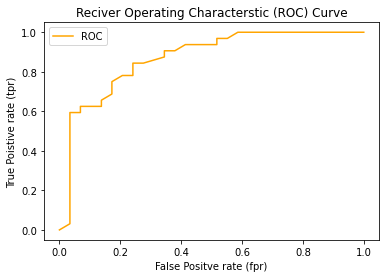

In [243]:
# Creating a fuction for plotting ROC curves

import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    
    """Plot a ROC curve given the false positve rate (fpr)
    and the true positive rate (tpr) of a model."""
    
    # Plot ROC curve
    plt.plot(fpr,tpr, color= "orange", label = "ROC")
    
    # Plot line with no predicctive power (baseLine)
    # plt.plot([0,1], [0,1], colour = "drakblue", linestyle="--", label= "Guessing")
    
    # Customize the plot
    plt.xlabel("False Positve rate (fpr)")
    plt.ylabel("True Poistive rate (tpr)")
    plt.title("Reciver Operating Characterstic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [247]:
# finding area under the curve
from sklearn. metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8701508620689655

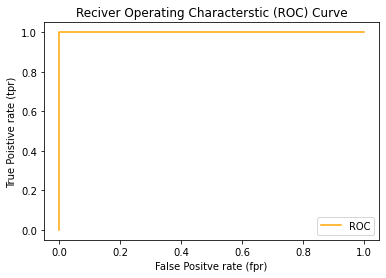

In [245]:
# Plot Perfect ROC curve and AUC score
fpr, tpr, threshold = roc_curve(y_test, y_test)
plot_roc_curve(fpr,tpr)

In [246]:
# Prefect AUC score
roc_auc_score(y_test, y_test)

1.0

# Lec 29. Evaluating A Classification Model 4 (Confusion Matrix)

### 3. Confusion Matrix

A confusion matrix is a quick way to compare the labels a model and the acual label it was supposed to predict

In essenc , giving you and idea of where the model is getting confused.

In [250]:
from sklearn.metrics import confusion_matrix

y_preds= clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[22,  7],
       [ 5, 27]], dtype=int64)

In [252]:
# Visualize confusin matrix with pd.corsstab()

pd.crosstab(y_test,
           y_preds,
           rownames= ["Actual Lables"],
           colnames= ["Predicted Lables"])

Predicted Lables,0,1
Actual Lables,,
0,22,7
1,5,27


In [253]:
22+7+5+27

61

In [254]:
len(X_test)

61

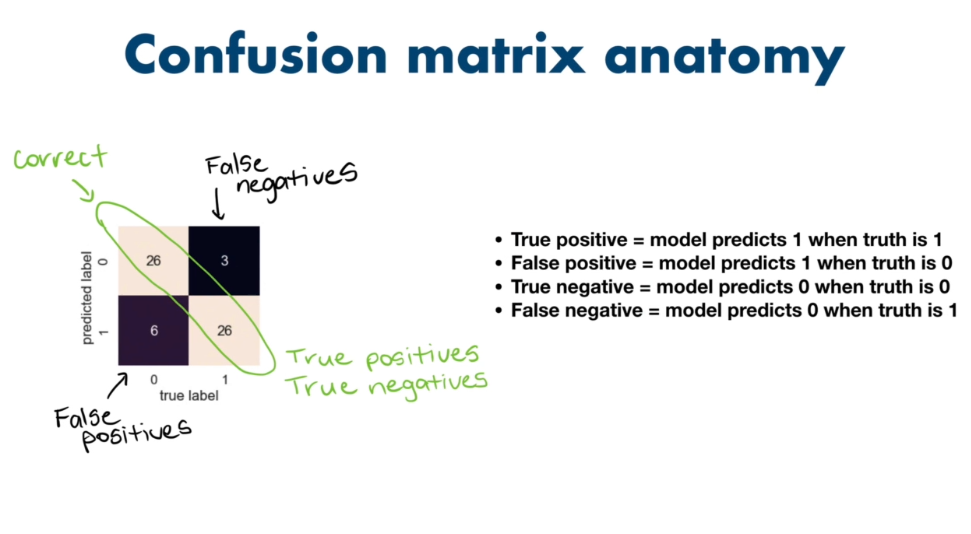

In [260]:
# How to install library within our environment from jupyter note book

import sys # to access our computer

!conda install --yes --prefix {sys.prefix} seaborn 
# here bang means bash command

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\ay569\Downloads\ML_Data_Analysis\env

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2022.6.15          |   py39haa95532_0         153 KB
    seaborn-0.11.2             |     pyhd3eb1b0_0         218 KB
    ------------------------------------------------------------
                                           Total:         371 KB

The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/noarch::seaborn-0.11.2-pyhd3eb1b0_0

The following packages will be UPDATED:

  certifi                        2022.5.18.1-py39haa95532_0 --> 2022.6.15-py39haa95532_0




certifi-2022.6.15    | 153 KB    |            |   0% 
certifi-2022.6.15    | 153 KB    | #          |  10% 
certifi-2022.6.15    | 153 KB    | ########## | 100% 
certifi-202

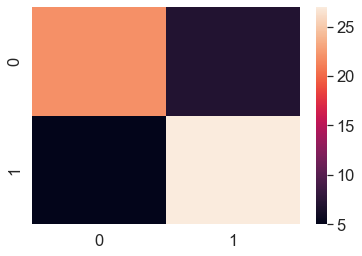

In [262]:
# Make our confusion matrix more visual with Seborn's heatmap()

# ** Note we don't have seborn so install in your env
    # One way via terminal
    # other way inside jupyter notebook
import seaborn as sns

# Set the font scale
sns.set(font_scale =1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using seaborn
sns. heatmap(conf_mat);

# Lec 30. Evaluating A Classification Model 5 (Confusion Matrix)

Making confusion matrix more detailed

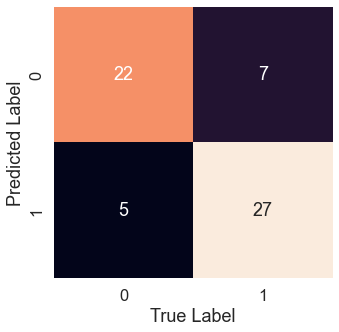

In [265]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seborn's heatmap().
    """
    fig, ax = plt.subplots(figsize =(5,5))
    ax = sns.heatmap(conf_mat,
                    annot = True, # Annoate the boxes with the conf_mat info
                    cbar = False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    
plot_conf_mat(conf_mat)

# Lec 31. Evaluating A Classification Model 6 (Classification Report)

### 4. Classifiction Report

It show the group of metrics

In [266]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.81      0.76      0.79        29
           1       0.79      0.84      0.82        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



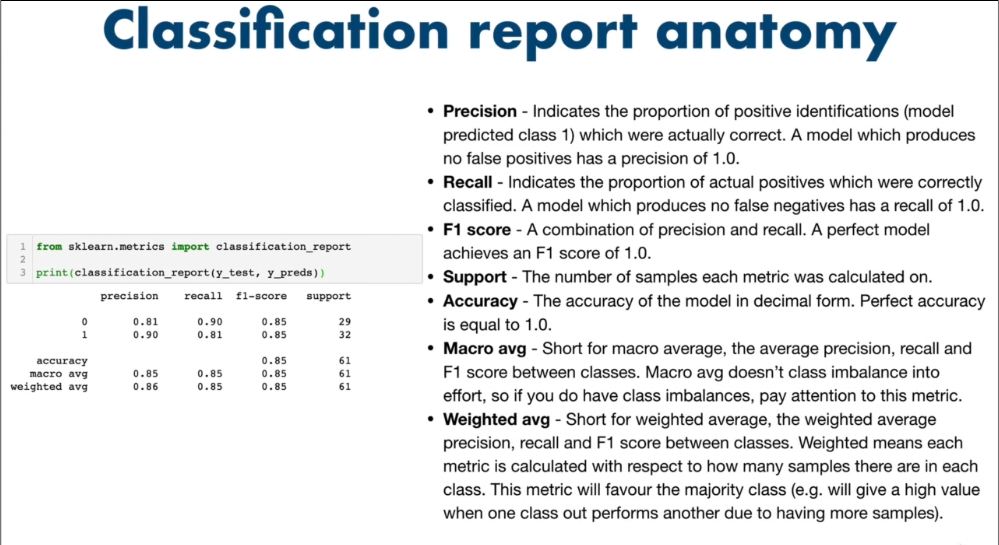

Why do we use all these differnt metrics, why don't we just use only one metric??
Ans. Because one metric is not always reliable so we need to use differnt diffrent matrices to evaluate our model

In [267]:
# Where Precison and recall become valuable

disease_true = np.zeros(10000)
disease_true[0]= 1 # only one positve case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict = True))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


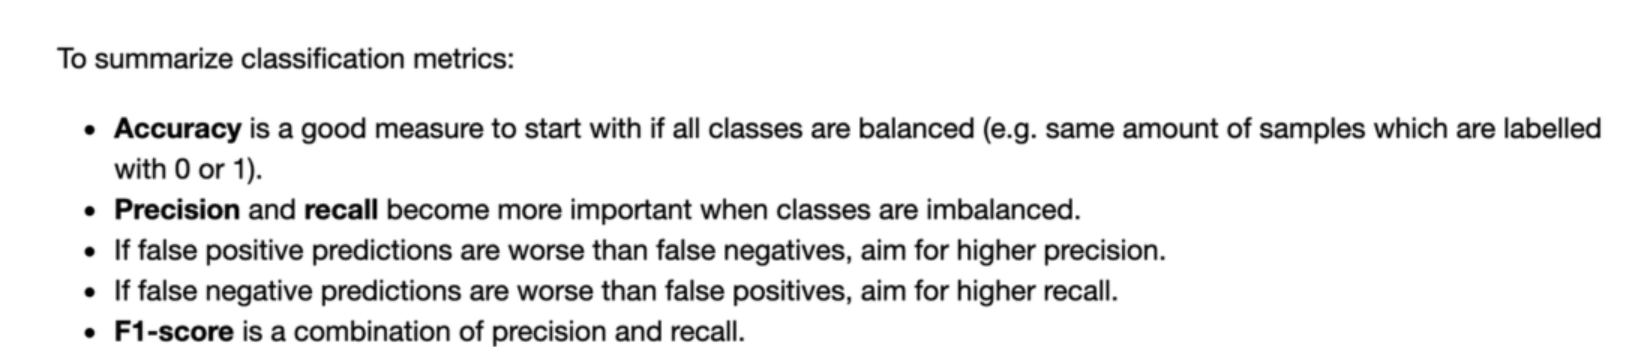

# Regression Matrices

Model evaluation metrics documentation (reffer to)

**Main type of Regression Matrices**
1. R^2 (r- squared) or coefficient of determination
2. Mean Absolute error (MAE)
3. Mean squared error (MSE)

# Lec 32. Evaluating A Regression Model 1 (R2 Score)

### 1. R^2 (R- Squared)

Compared your models prediction to the mean of the target. Values can range from neagative infinity (a poor model) to 1. For example, if all your model dose is predict meant of the target, it's R^2 value would be 0 if your model perfectly predict a range of number it's R^2 value would be 1.

In [271]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis =1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

model= RandomForestRegressor()

model.fit(X_train, y_train);

In [272]:
model.score(X_test, y_test)

0.8654448653350507

In [277]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean

y_test_mean = np.full(len(y_test), y_test.mean())

In [278]:
y_test.mean()

21.488235294117654

In [279]:
r2_score(y_test, y_test_mean)

2.220446049250313e-16

In [280]:
r2_score(y_test, y_test)

1.0

# Lec 33. Evaluating A Regression Model 2 (MAE)

### 2. Mean Absolute erroe (MAE)

In [282]:
# Mean Absolute Error

from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)

mae= mean_absolute_error(y_test, y_preds)
mae

2.136382352941176

In [297]:
df = pd.DataFrame(data = {"actual values": y_test,
                         "predicted values": y_preds})
df["deffernces"] =df["predicted values"]-df["actual values"]
df["MAE"]= mae
df["MAE - actual"]= df["predicted values"] - df["MAE"]
df["actual + MAE"]= df["predicted values"] + df["MAE"]
df.head(20)

,actual values,predicted values,deffernces,MAE,MAE - actual,actual + MAE
173,23.6,23.081,-0.519,2.136382,20.944618,25.217382
274,32.4,30.574,-1.826,2.136382,28.437618,32.710382
491,13.6,16.759,3.159,2.136382,14.622618,18.895382
72,22.8,23.460,0.660,2.136382,21.323618,25.596382
452,16.1,16.893,0.793,2.136382,14.756618,19.029382
76,20.0,21.644,1.644,2.136382,19.507618,23.780382
316,17.8,19.113,1.313,2.136382,16.976618,21.249382
140,14.0,15.334,1.334,2.136382,13.197618,17.470382
471,19.6,21.140,1.540,2.136382,19.003618,23.276382
500,16.8,20.639,3.839,2.136382,18.502618,22.775382


# Lec 34. Evaluating A Regression Model 3 (MSE)

### 3. Mean Squared Error (MSE)

In [299]:
# Mean Squared Error

from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)

mse= mean_squared_error(y_test, y_preds)
mse

9.867437068627442

In [301]:
# Calculate MSE by hand

squared = np.square(df["deffernces"])
squared.mean()

9.867437068627439

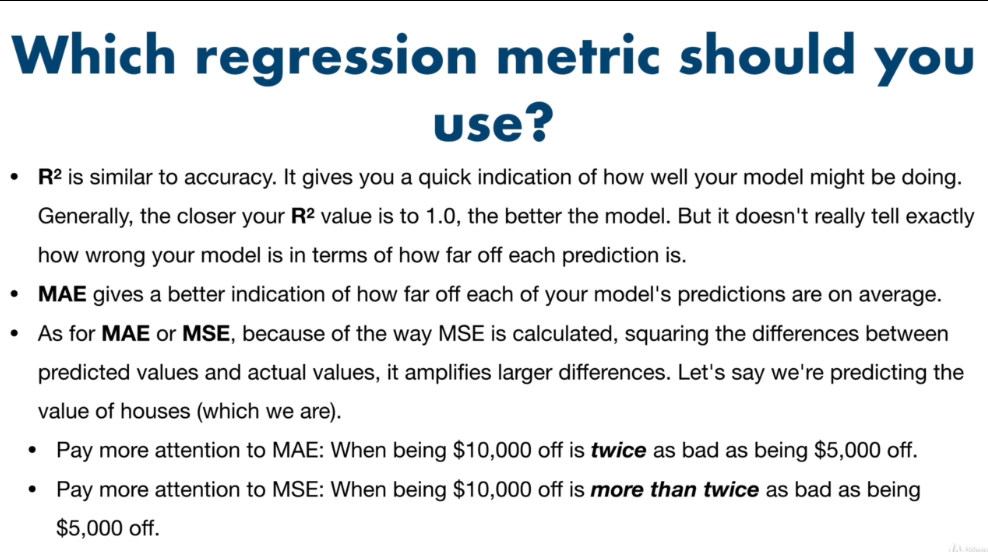